In [150]:
import librosa
import librosa.display as ld
import matplotlib.pyplot as plt
import numpy as np
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
import torch


In [151]:
y, sr = librosa.load("train/cat/004ae714_nohash_0.wav", sr=None)
ipd.Audio(y, rate=sr)

# STFT

In [152]:
y.shape, sr


((16000,), 16000)

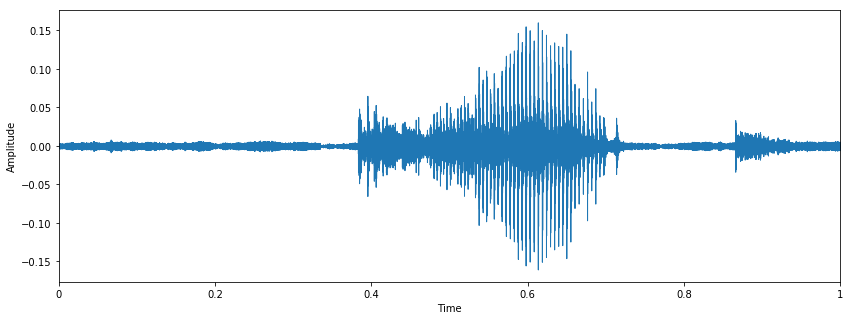

In [153]:
plt.figure(figsize=(14, 5))
plt.ylabel("Amplitude")
librosa.display.waveplot(y, sr=sr)
plt.show()

In [154]:
window_size=0.02
window_stride=0.01
window="hamming"
n_fft = int(sr * window_size)
win_length = n_fft
hop_length = int(sr * window_stride)

In [155]:
D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length,
                     win_length=win_length, window=window)

D.shape


(161, 101)

Separate a complex-valued spectrogram D into its magnitude (S) and phase (P) components, so that D = S * P.

In [156]:

spect, phase = librosa.magphase(D)

/Users/amaladeshpande/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:983: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


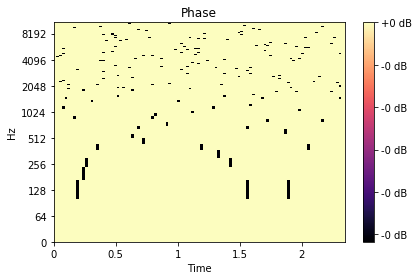

In [157]:
ld.specshow(librosa.amplitude_to_db(phase,ref=np.max),y_axis='log', x_axis='time')
plt.title('Phase') 
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

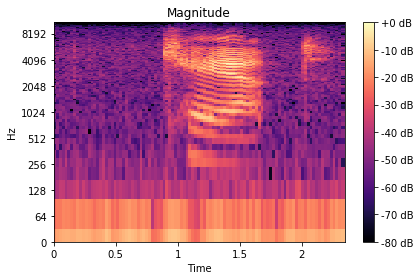

In [158]:
ld.specshow(librosa.amplitude_to_db(spect,ref=np.max),y_axis='log', x_axis='time')
plt.title('Magnitude') 
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

In [159]:
spect.shape

(161, 101)

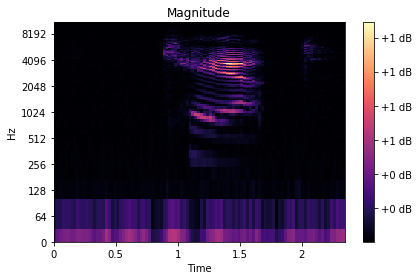

In [160]:

ld.specshow(np.log1p(spect),y_axis='log', x_axis='time')
plt.title('Magnitude') 
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

# MEL Spectrogram


Using y_axis=mel plots the y-axis on the mel scale which is similar to the  log(1+f)  function:

m=2595*log10(1+f/700)

In [166]:
def mel_spect(nmel):
    S=librosa.feature.melspectrogram(y, sr=sr,n_fft=n_fft,hop_length=hop_length, n_mels=nmel)
   
    logS = librosa.power_to_db(abs(S))
    print(logS.shape)
    return logS

(32, 101)


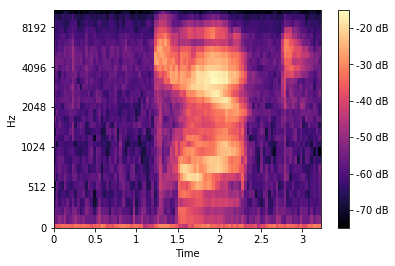

(40, 101)


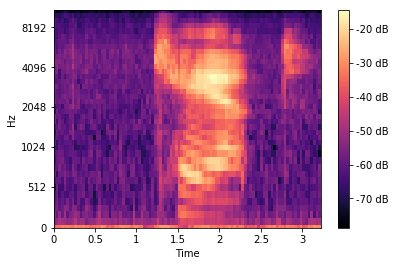

(50, 101)


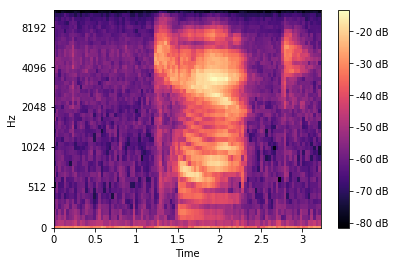

(64, 101)


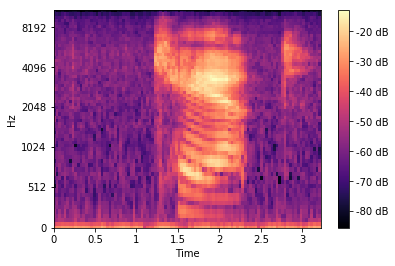

(100, 101)


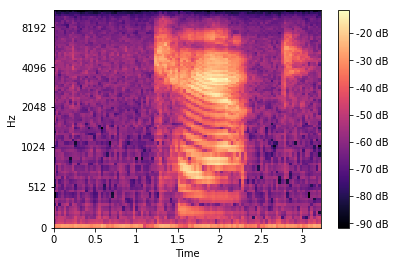

In [172]:
for i in [32,40,50, 64, 100]:
    librosa.display.specshow(mel_spect(i), sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

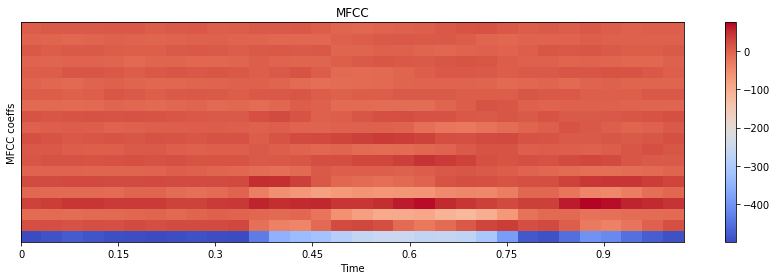

In [173]:
mfcc = librosa.feature.mfcc(y, sr=sr)

plt.figure(figsize=(12, 4))
librosa.display.specshow(mfcc, sr=sr, x_axis='time')
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()
plt.show()

In [171]:
log = librosa.power_to_db(abs(mfcc))

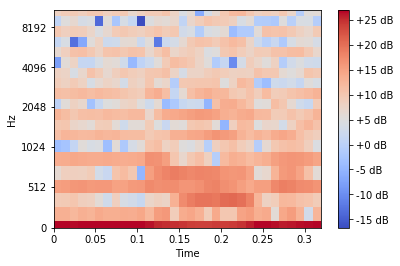

In [124]:
librosa.display.specshow(log, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.show()

In [125]:
mfcc.shape

(20, 32)